# Area, production, and farm value of potatoes
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210035801 

### Imports

In [1]:
import numpy  as np             # Matlab-like array handling
import pandas as pd             # Data tables
import matplotlib.pyplot as plt # Matlab-like plottingss
import csv
import os
import matplotlib.patches as patches   # for overlaying shapes on graphs

import import_ipynb
import sys
import scipy.stats as st

%matplotlib notebook
%pylab inline


Populating the interactive namespace from numpy and matplotlib


### Notes

- hundredweight is 50 kg
- acre is 4,047 m2

In [32]:
dpiVal = 130

### Read data file

In [2]:
df = pd.read_csv('data/potatos.csv')

### Canada data 

In [7]:
df.columns

Index(['REF_DATE', 'GEO', 'DGUID',
       'Area, production and farm value of potatoes', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [8]:
canada_df = df.loc[df['GEO']=='Canada']

In [9]:
years = [yr for yr in range(1908:2020)]

REF_DATE     GEO           DGUID  \
0         1908  Canada  2016A000011124   
1         1908  Canada  2016A000011124   
2         1908  Canada  2016A000011124   
3         1908  Canada  2016A000011124   
4         1908  Canada  2016A000011124   
45        1909  Canada  2016A000011124   
46        1909  Canada  2016A000011124   
47        1909  Canada  2016A000011124   
48        1909  Canada  2016A000011124   
49        1909  Canada  2016A000011124   
90        1910  Canada  2016A000011124   
91        1910  Canada  2016A000011124   
92        1910  Canada  2016A000011124   
93        1910  Canada  2016A000011124   
94        1910  Canada  2016A000011124   
140       1911  Canada  2016A000011124   
141       1911  Canada  2016A000011124   
142       1911  Canada  2016A000011124   
143       1911  Canada  2016A000011124   
144       1911  Canada  2016A000011124   
190       1912  Canada  2016A000011124   
191       1912  Canada  2016A000011124   
192       1912  Canada  2016A000011124   
193       1912  Canada  2016A000011124   
194       1912  Canada  2016A000011124   
240       1913  Canada  2016A000011124   
241       1913  Canada  2016A000011124   
242       1913  Canada  2016A000011124   
243       1913  Canada  2016A000011124   
244       1913  Canada  2016A000011124   
...        ...     ...             ...   
6255      2015  Canada  2016A000011124   
6256      2015  Canada  2016A000011124   
6257      2015  Canada  2016A000011124   
6258      2015  Canada  2016A000011124   
6259      2015  Canada  2016A000011124   
6330      2016  Canada  2016A000011124   
6331      2016  Canada  2016A000011124   
6332      2016  Canada  2016A000011124   
6333      2016  Canada  2016A000011124   
6334      2016  Canada  2016A000011124   
6335      2016  Canada  2016A000011124   
6336      2016  Canada  2016A000011124   
6407      2017  Canada  2016A000011124   
6408      2017  Canada  2016A000011124   
6409      2017  Canada  2016A000011124   
6410      2017  Canada  2016A000011124   
6411      2017  Canada  2016A000011124   
6412      2017  Canada  2016A000011124   
6413      2017  Canada  2016A000011124   
6484      2018  Canada  2016A000011124   
6485      2018  Canada  2016A000011124   
6486      2018  Canada  2016A000011124   
6487      2018  Canada  2016A000011124   
6528      2019  Canada  2016A000011124   
6529      2019  Canada  2016A000011124   
6530      2019  Canada  2016A000011124   
6531      2019  Canada  2016A000011124   
6532      2019  Canada  2016A000011124   
6533      2019  Canada  2016A000011124   
6534      2019  Canada  2016A000011124   

            Area, production and farm value of potatoes  \
0                                 Seeded area, potatoes   
1                               Average yield, potatoes   
2                                  Production, potatoes   
3                          Average farm price, potatoes   
4                            Total farm value, potatoes   
45                                Seeded area, potatoes   
46                              Average yield, potatoes   
47                                 Production, potatoes   
48                         Average farm price, potatoes   
49                           Total farm value, potatoes   
90                                Seeded area, potatoes   
91                              Average yield, potatoes   
92                                 Production, potatoes   
93                         Average farm price, potatoes   
94                           Total farm value, potatoes   
140                               Seeded area, potatoes   
141                             Average yield, potatoes   
142                                Production, potatoes   
143                        Average farm price, potatoes   
144                          Total farm value, potatoes   
190                               Seeded area, potatoes   
191                             Average yield, potatoes   
192                                Productio

In [65]:
canada_seeded_area = canada_df.loc[df['Area, production and farm value of potatoes']=='Seeded area, potatoes'] 
canada_average_yield = canada_df.loc[df['Area, production and farm value of potatoes']=='Average yield, potatoes'] 
canada_production = canada_df.loc[df['Area, production and farm value of potatoes']=='Production, potatoes'] 
canada_average_farm_price = canada_df.loc[df['Area, production and farm value of potatoes']=='Average farm price, potatoes'] 
canada_total_farm_value = canada_df.loc[df['Area, production and farm value of potatoes']=='Total farm value, potatoes'] 

#### Plot trends 

Text(0.5,1,'Canada Seeded Area')

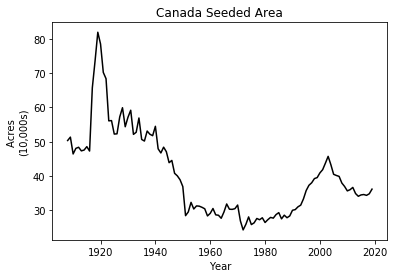

In [31]:
years = [yr for yr in range(1908,2020)]
canada_seeded_area[['REF_DATE','UOM','VALUE']]

plot(canada_seeded_area['REF_DATE'],canada_seeded_area['VALUE']/10000,'k-')
xlabel('Year')
ylabel("%s \n(10,000s)" % (canada_seeded_area['UOM'][0]))
title('Canada Seeded Area')

1 1
1 1
1000 1
1 1
1000 1


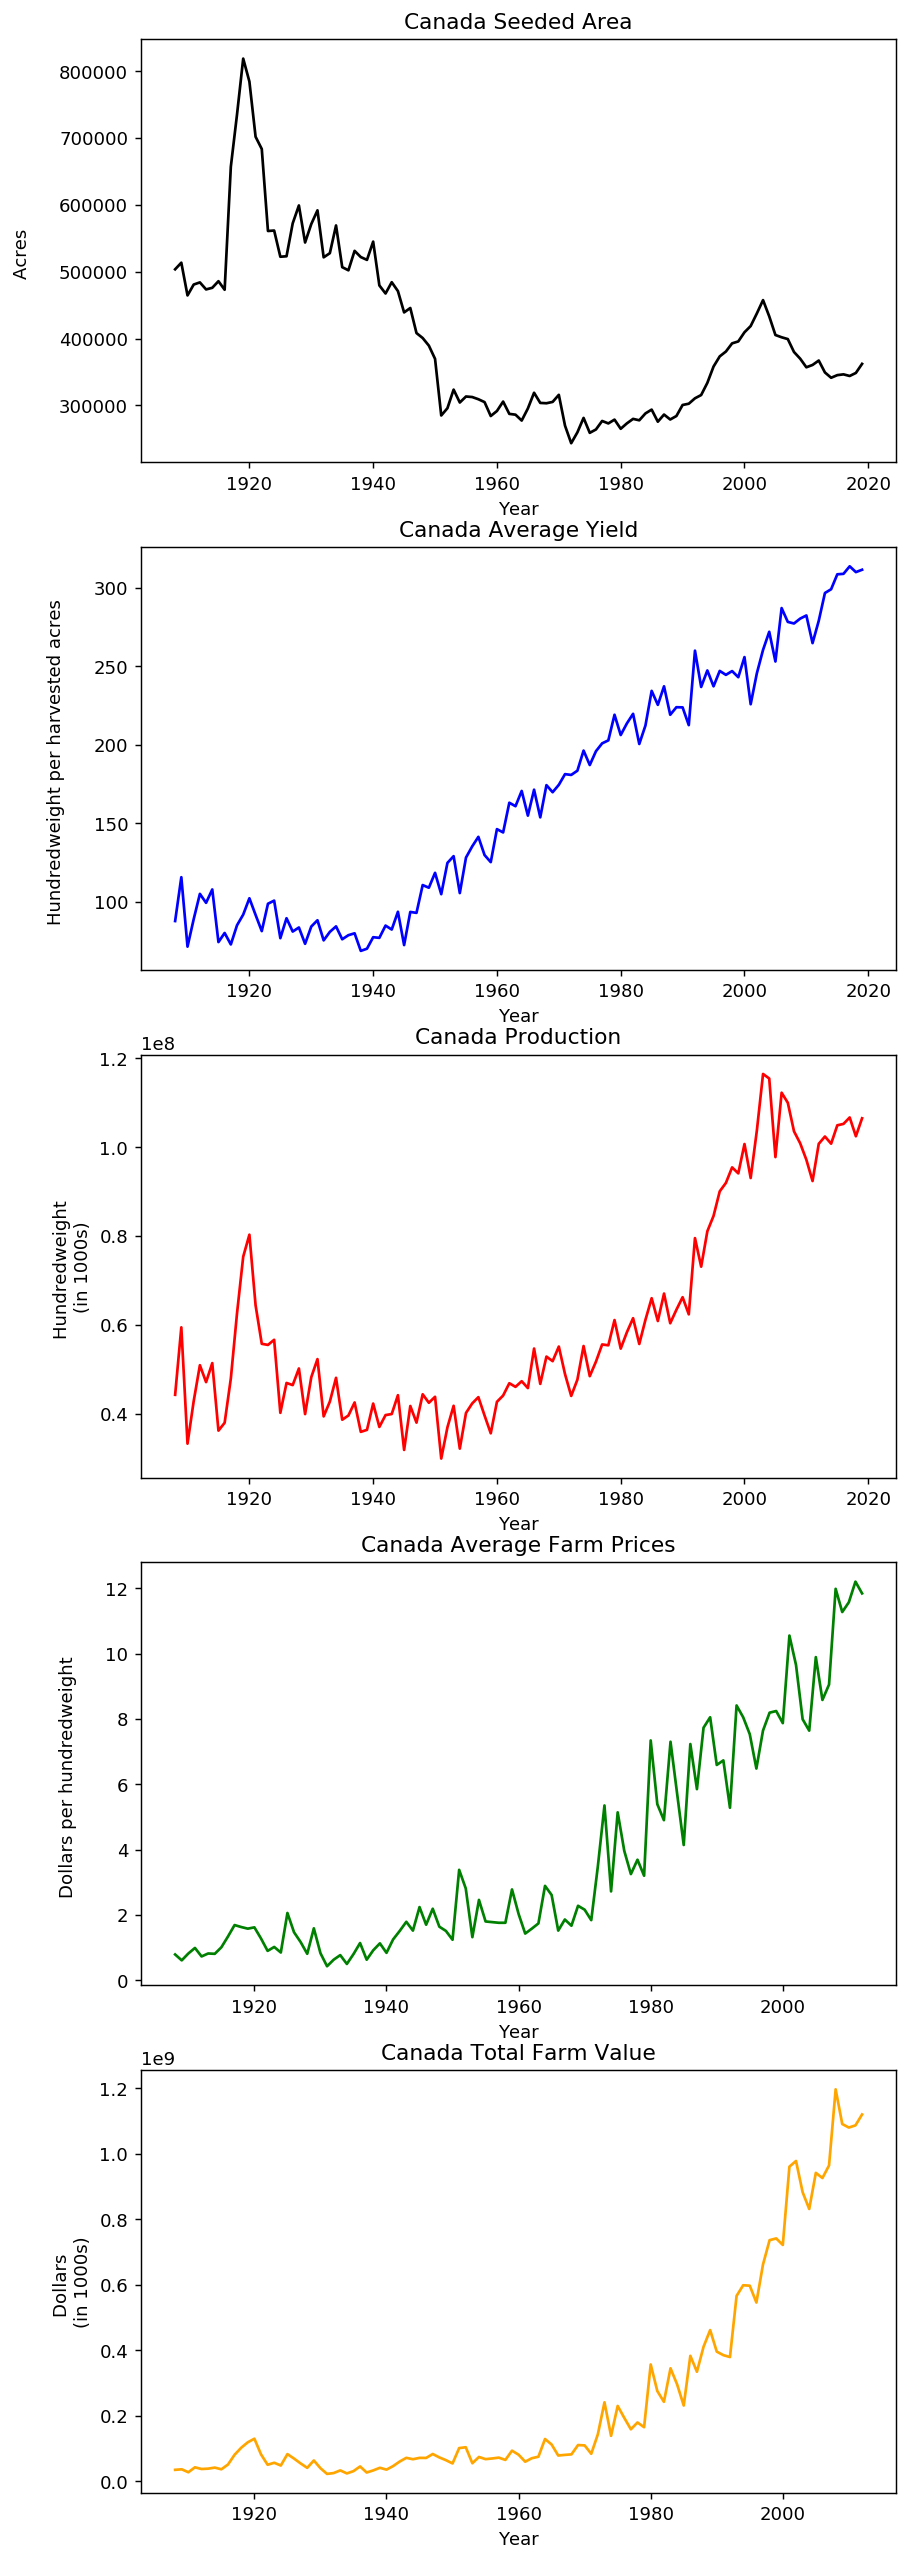

In [84]:
dataStructs = [canada_seeded_area,
               canada_average_yield,
               canada_production,
               canada_average_farm_price,
               canada_total_farm_value]

titles = ['Canada Seeded Area',
          'Canada Average Yield',
          'Canada Production',
          'Canada Average Farm Prices',
          'Canada Total Farm Value']

yScales = [1000,
           1,
           1000000,
           1,
           1]

yScales = [1,1,1,1,1]

clrs = ['black',
       'blue',
       'red',
       'green',
       'orange']

years = [yr for yr in range(1908,2020)]

fig, axes = plt.subplots(nrows=5, ncols=1, squeeze=False, sharex=False, sharey=False, figsize=(7.5,25), dpi=dpiVal)
for i in range(5):
    ax = axes[i][0]
    ds = dataStructs[i]
        
    uomString = ds['UOM'].tolist()[0]
    
    unitScale = 10**(ds['SCALAR_ID'].tolist()[0])
    print(unitScale,yScales[i])
    
    scaledUnitsString = ""
    if unitScale/yScales[i]!=1:
        scaledUnitsString = "(in %ds)" % (unitScale)
            
    values = ds['VALUE']*unitScale/yScales[i]
    
    ax.plot(ds['REF_DATE'],values,c=clrs[i],ls='-')
    ax.set_xlabel('Year')
    ax.set_ylabel("%s \n%s" % (uomString,scaledUnitsString))
    ax.set_title(titles[i])
    
    

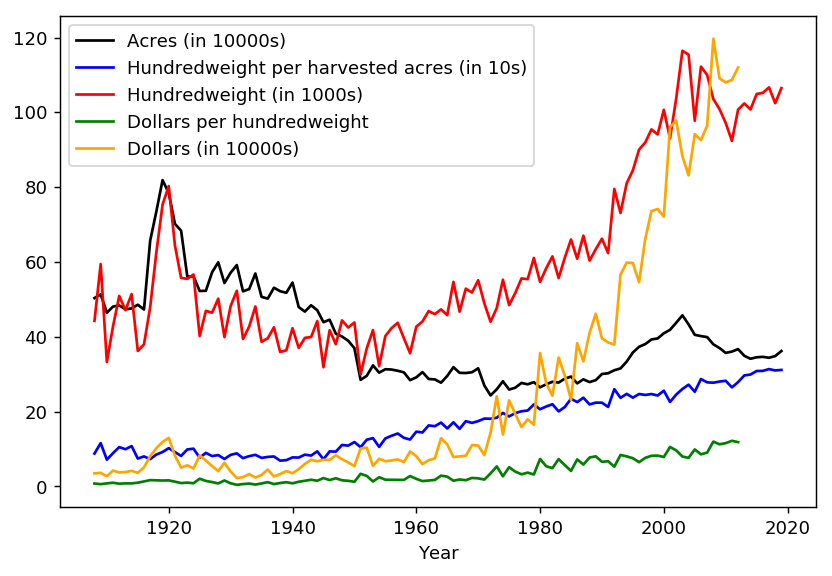

In [48]:
yScales = [10000,10,1000,1,10000]

fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=True, sharex=False, sharey=False, figsize=(7.5,5), dpi=dpiVal)
ax = axes

for i in range(5):
    
    ds = dataStructs[i]
    
    scaledUnitsString = ""
    if yScales[i]!=1:
        scaledUnitsString = "(in %ds)" % yScales[i]
        
    uomString = ds['UOM'].tolist()[0]
    
    ax.plot(ds['REF_DATE'],ds['VALUE']/yScales[i],c=clrs[i],ls='-',label="%s %s" % (uomString, scaledUnitsString))
    ax.set_xlabel('Year')
    #ax.set_ylabel("%s \n%s" % (uomString,scaledUnitsString))
    #ax.set_title(titles[i])
    
    ax.legend()
    